In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import os

sns.set_theme(style='whitegrid')
sns.set_palette('colorblind')

In [3]:
%matplotlib inline
from data_exploration import explore

## Read the dataset

In [4]:
# temp = pd.read_csv('./data/titanic.csv')
temp = pd.read_csv("/home/hung/Data/fxsb/USDxxx/GBPUSD/GBPUSD_240.csv")
temp.head()

,time,open,high,low,close,volume
0,2007-08-11 00:00:00,2.02352,2.02430,2.02278,2.02278,3913
1,2007-08-13 04:00:00,2.02133,2.02350,2.02086,2.02340,34357
2,2007-08-13 08:00:00,2.02321,2.02585,2.02200,2.02330,76452
3,2007-08-13 12:00:00,2.02330,2.02450,2.01500,2.01665,254695
4,2007-08-13 16:00:00,2.01665,2.01680,2.00840,2.01480,373391


In [5]:
temp['time'] = pd.to_datetime(temp['time'])

In [6]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25614 entries, 0 to 25613
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    25614 non-null  datetime64[ns]
 1   open    25614 non-null  float64       
 2   high    25614 non-null  float64       
 3   low     25614 non-null  float64       
 4   close   25614 non-null  float64       
 5   volume  25614 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 1.2 MB


In [13]:
use_cols = ['time', 'close', 'volume']
data = pd.read_csv('/home/hung/Data/fxsb/USDxxx/GBPUSD/GBPUSD_240.csv', usecols=use_cols, parse_dates=['time'])

In [14]:
data['change'] = data['close'].pct_change()*100

In [15]:
data.dropna(inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25613 entries, 1 to 25613
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    25613 non-null  datetime64[ns]
 1   close   25613 non-null  float64       
 2   volume  25613 non-null  int64         
 3   change  25613 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 1000.5 KB


In [17]:
data.head()

,time,close,volume,change
1,2007-08-13 04:00:00,2.02340,34357,0.030651
2,2007-08-13 08:00:00,2.02330,76452,-0.004942
3,2007-08-13 12:00:00,2.01665,254695,-0.328671
4,2007-08-13 16:00:00,2.01480,373391,-0.091736
5,2007-08-13 20:00:00,2.01140,599261,-0.168751


## Get dtypes for each columns

In [14]:
str_var_list, num_var_list, all_var_list = explore.get_dtypes(data=data)

In [15]:
print(str_var_list) # string type
print(num_var_list) # numeric type
print(all_var_list) # all

['time']
['close', 'volume']
['time', 'close', 'volume']


## General data description

In [16]:
explore.describe(data=data,output_path=r'./output/')

,time,close,volume
count,25614,25614.000000,2.561400e+04
mean,2015-09-18 18:11:56.795502592,1.471675,3.784031e+04
min,2007-08-11 00:00:00,1.040000,2.940000e+02
25%,2011-08-27 13:00:00,1.301223,1.379825e+04
50%,2015-09-17 22:00:00,1.464620,2.442250e+04
75%,2019-10-10 11:00:00,1.596830,4.151550e+04
max,2023-10-27 20:00:00,2.111100,2.586920e+06
std,NaN,0.203713,7.747995e+04


## Discrete variable barplot
draw the barplot of a discrete variable x against y(target variable). 
By default the bar shows the mean value of y.

In [ ]:
explore.discrete_var_barplot(x='close',y='volume',data=data,output_path='./output/')

KeyboardInterrupt: 

## Discrete variable countplot
draw the countplot of a discrete variable x

Image saved at ./output/Countplot_Pclass.png


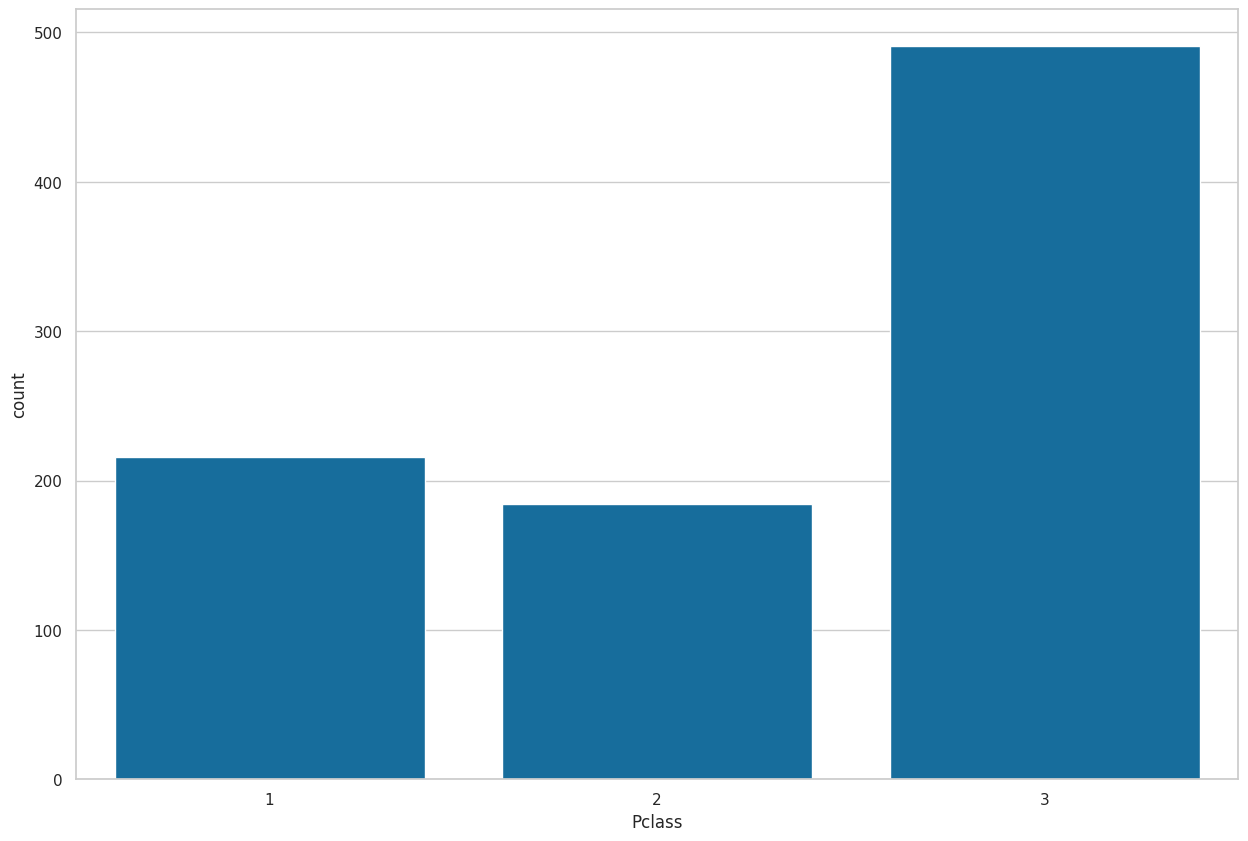

In [46]:
explore.discrete_var_countplot(x='Pclass',data=data,output_path='./output/')

## Discrete variable boxplot
draw the boxplot of a discrete variable x against y.

Image saved at ./output/Boxplot_Pclass_Fare.png


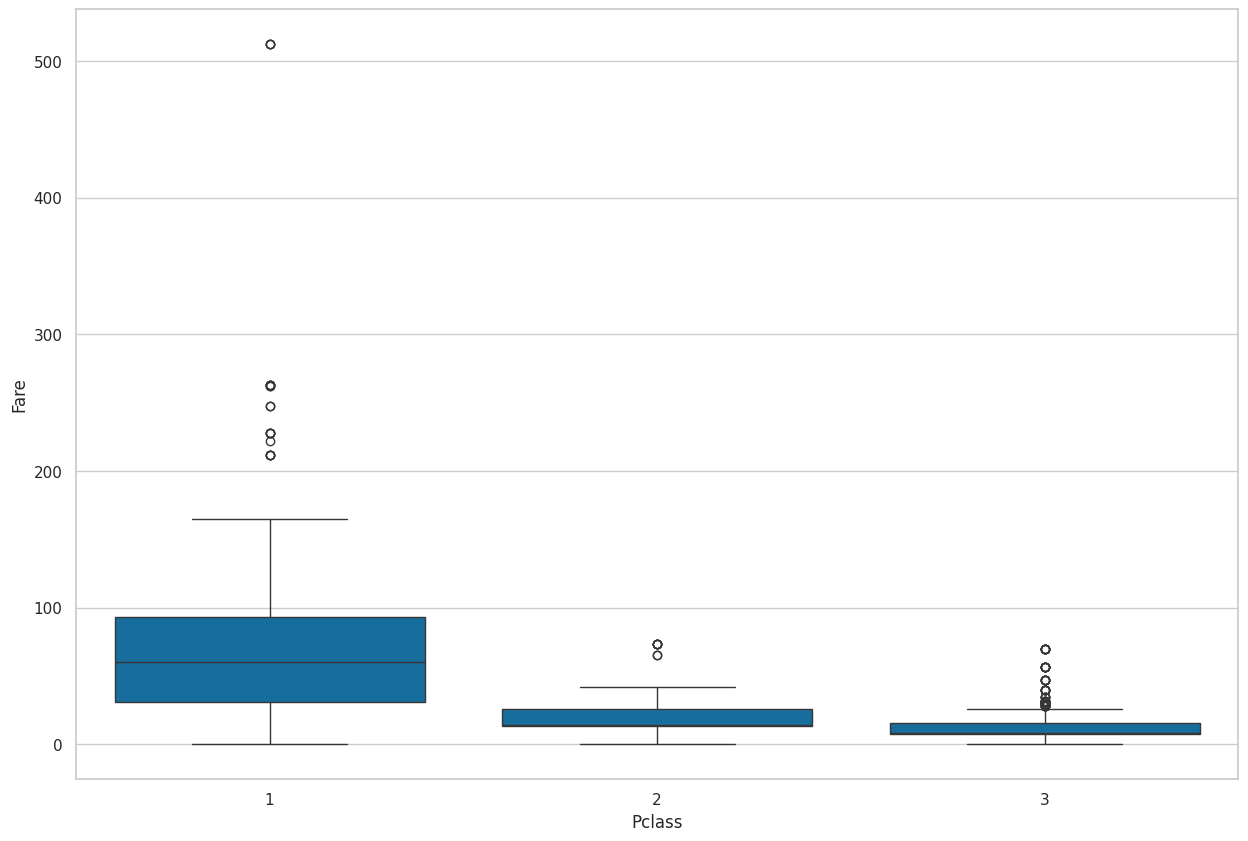

In [47]:
explore.discrete_var_boxplot(x='Pclass',y='Fare',data=data,output_path='./output/')

## Continuous variable distplot
draw the distplot of a continuous variable x.

/home/hung/Documents/SIDE/machine-learning/books/amazing-feature-engineering/data_exploration/explore.py:137: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=x, kde=False, bins=bins)


Image saved at ./output/Distplot_Fare.png


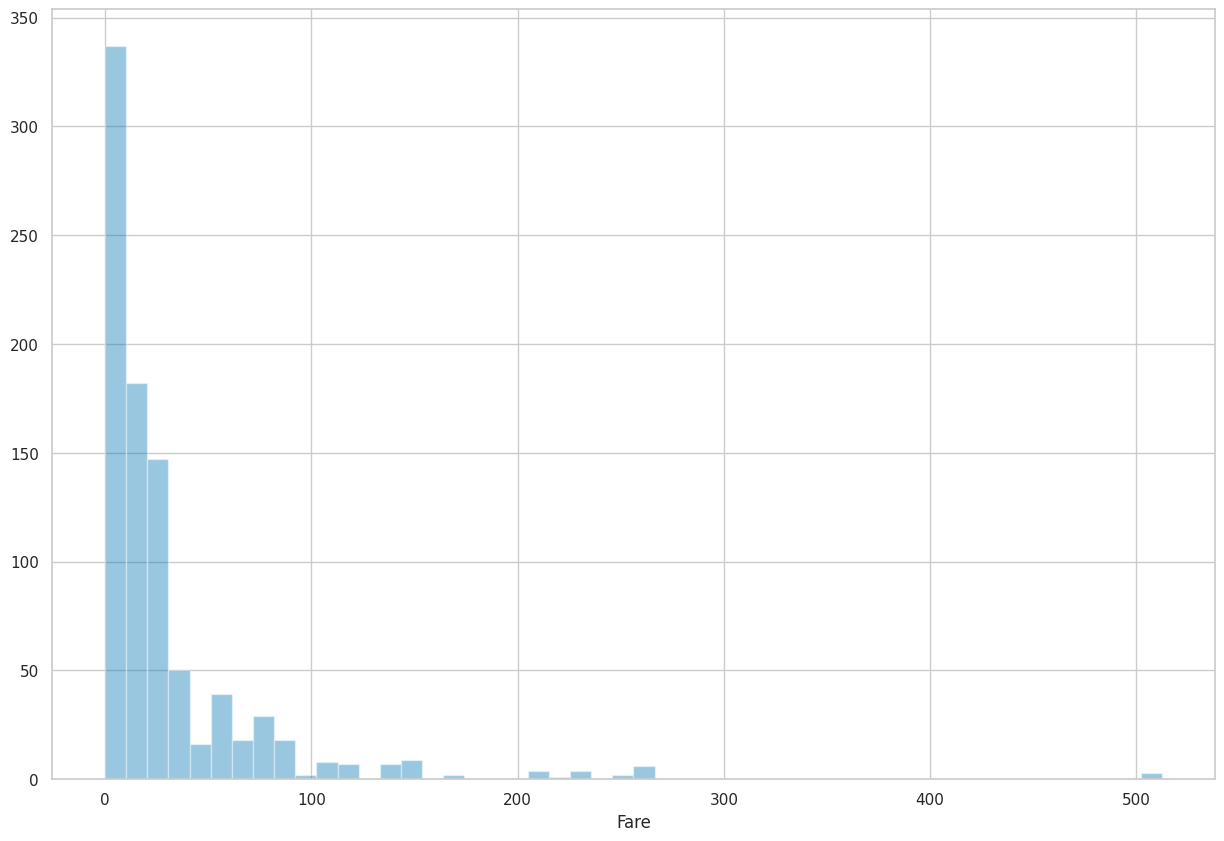

In [48]:
explore.continuous_var_distplot(x=data['Fare'],output_path='./output/')

## Scatter plot
draw the scatter-plot of two variables.

Image saved at ./output/Scatter_plot_Fare_Pclass.png


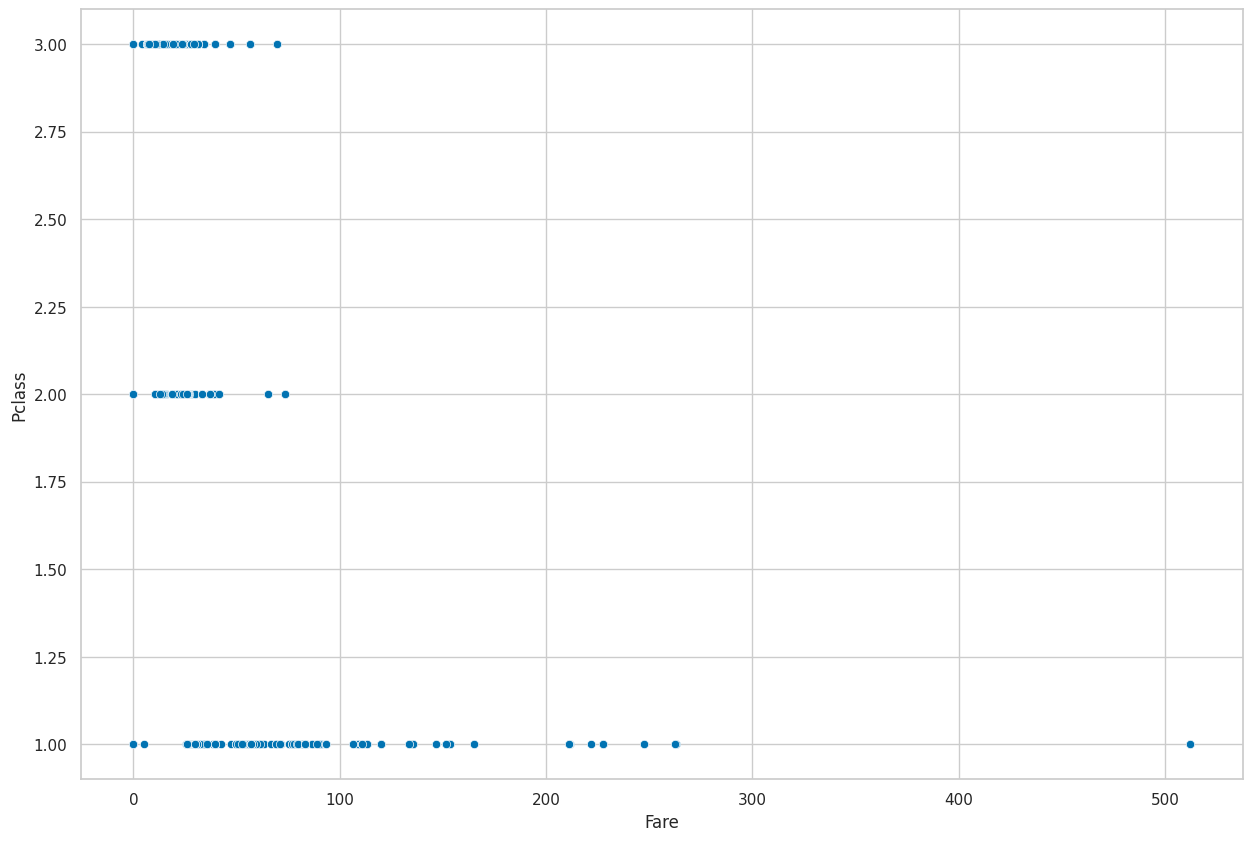

In [49]:
explore.scatter_plot(x=data.Fare,y=data.Pclass,data=data,output_path='./output/')

## Correlation plot
draw the correlation plot between variables.

<Axes: xlabel='Sex'>

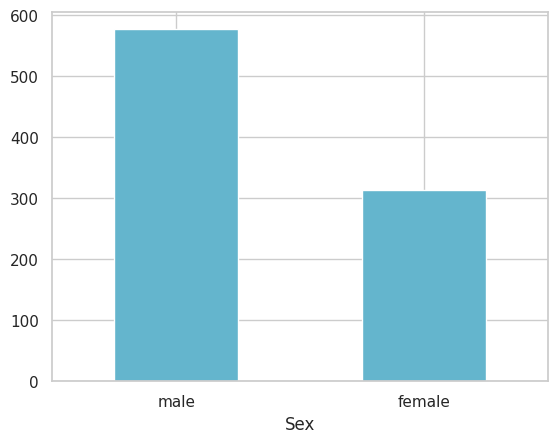

In [50]:
data['Sex'].value_counts().plot(kind='bar',color='c',rot=0)

In [51]:
data["Sex"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Sex
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [52]:
data["Sex"] = data["Sex"].astype('category')
data["Sex"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Sex
Non-Null Count  Dtype   
--------------  -----   
891 non-null    category
dtypes: category(1)
memory usage: 1.1 KB


In [53]:
data["Sex"] = data["Sex"].cat.codes
data

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,1,22.0,1,7.2500
1,1,1,0,38.0,1,71.2833
2,1,3,0,26.0,0,7.9250
3,1,1,0,35.0,1,53.1000
4,0,3,1,35.0,0,8.0500
...,...,...,...,...,...,...
886,0,2,1,27.0,0,13.0000
887,1,1,0,19.0,0,30.0000
888,0,3,0,NaN,1,23.4500
889,1,1,1,26.0,0,30.0000


Image saved at ./output/Corr_plot.png


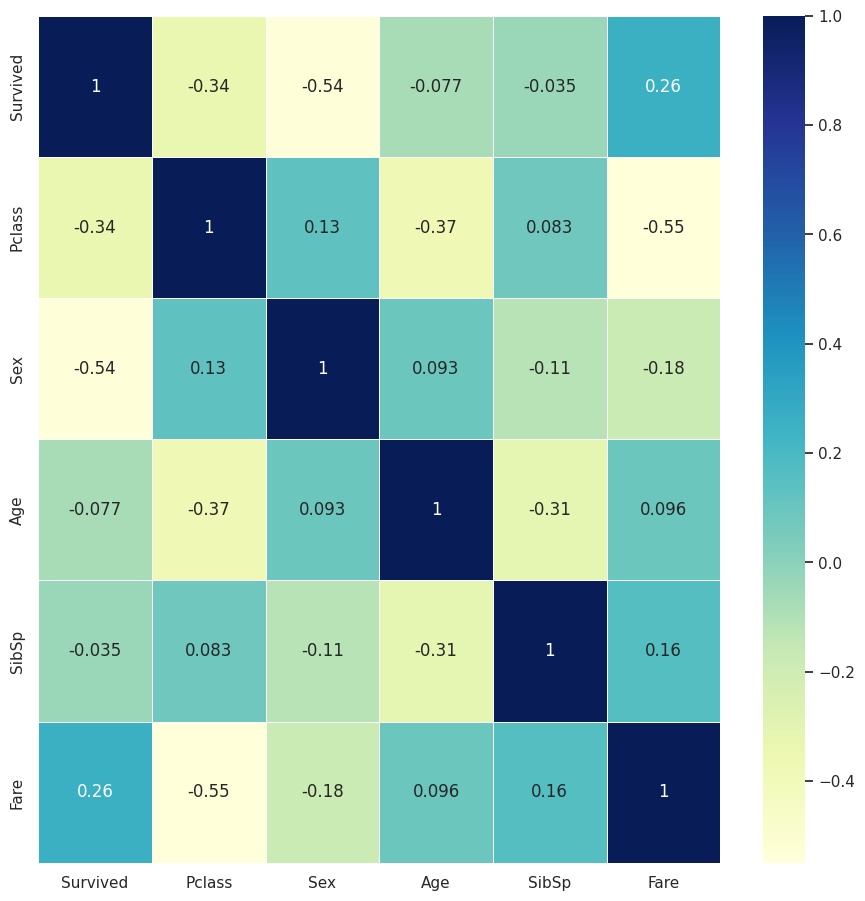

In [54]:
explore.correlation_plot(data=data,output_path='./output/')

## Heatmap

   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121
Image saved at ./output/Heatmap.png


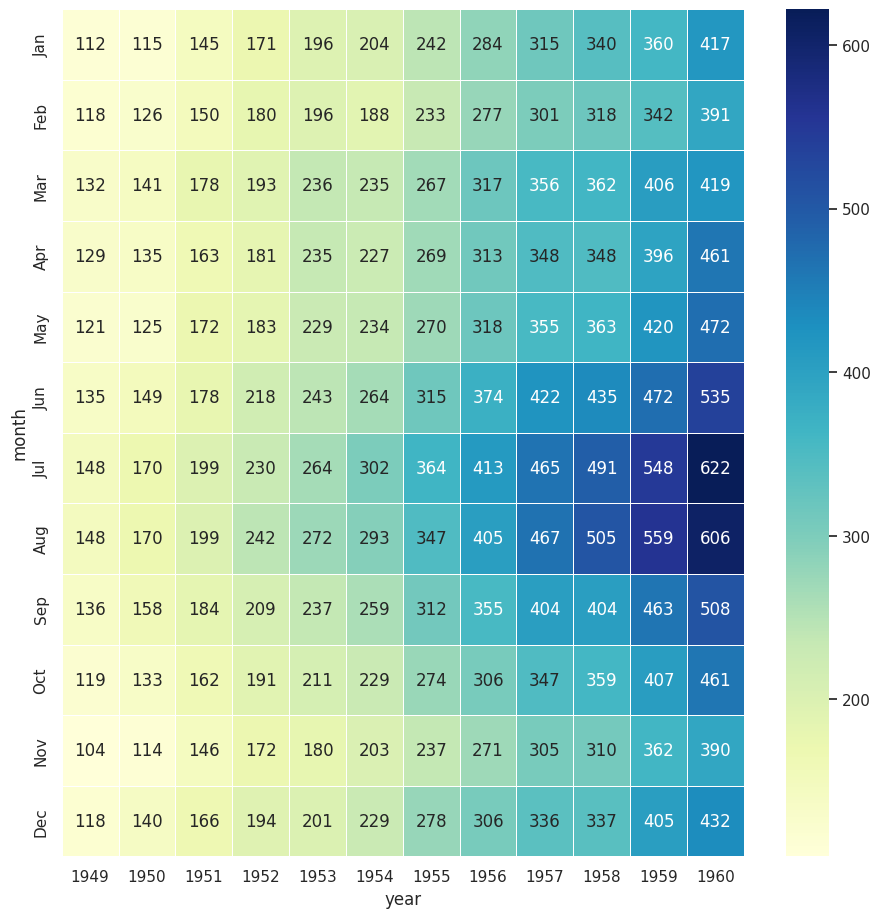

In [55]:
flights = sns.load_dataset("flights")
print(flights.head(5))
# explore.heatmap(data=data[['Sex','Survived']])
flights = flights.pivot(index="month", columns="year", values="passengers")
# flights = flights.pivot_table("month", "year", "passengers")
explore.heatmap(data=flights,output_path='./output/')